In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist=keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
class_name=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

# Data Exploration

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

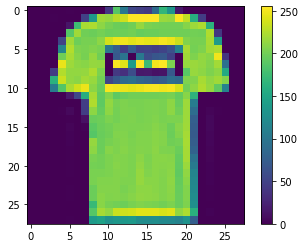

In [11]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [12]:
X_train=X_train/255

In [13]:
X_test=X_test/255

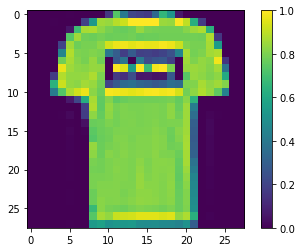

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# Build the model with TF2

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [17]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function

- Optimizer

- Metrics

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5010 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3383 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3146 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2806 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2565 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2472 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [21]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8846
0.8845999836921692


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
accuracy_score(y_test,y_pred)

0.8846

In [27]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [25]:
pred=model.predict(X_test)

In [26]:
pred

array([[2.7645456e-07, 8.7500611e-11, 1.1784738e-10, ..., 4.7754021e-03,
        2.0491145e-08, 9.9441457e-01],
       [1.2373487e-06, 4.7353811e-16, 9.9851471e-01, ..., 5.2105993e-12,
        1.0017821e-08, 8.6172293e-16],
       [2.0501441e-09, 1.0000000e+00, 2.5234415e-10, ..., 2.3658092e-19,
        2.4590033e-10, 2.7430093e-16],
       ...,
       [2.3935136e-06, 1.0763467e-12, 1.0918157e-07, ..., 3.1957516e-11,
        9.9998939e-01, 2.3051645e-12],
       [1.1665384e-09, 9.9999642e-01, 2.8465919e-10, ..., 1.9045637e-15,
        1.2015368e-08, 7.0398109e-13],
       [1.3408773e-05, 6.7162245e-09, 1.1048721e-06, ..., 7.0012244e-04,
        3.5140518e-05, 1.6746530e-06]], dtype=float32)

In [28]:
pred[0]

array([2.7645456e-07, 8.7500611e-11, 1.1784738e-10, 9.4126697e-15,
       1.6611114e-08, 8.0967584e-04, 1.1591119e-08, 4.7754021e-03,
       2.0491145e-08, 9.9441457e-01], dtype=float32)

In [29]:
np.argmax(pred[0])

9

In [30]:
np.argmax(pred[1])

2